In [263]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [130]:
filepath = 'indeed_jobs.csv'

df = pd.read_csv(filepath, header=None).drop(0, axis=1)
df.head()

,1,2,3,4,5
0,Junior Investment Data Analyst,ACR Alpine Capital Research,JOB TITLE: Junior Investment Data Analyst Loca...,www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AS...,20220121
1,Sports Gaming Data Entry Analyst,Sports Gaming Technology Firm,"Sports Gaming Data Entry Analyst in Arlington,...",www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0Cn...,20220121
2,Workforce Data Analyst,California Public Employees' Retirement System...,The California Public Employees’ Retirement Sy...,www.indeed.com/company/California-Public-Emplo...,20220121
3,Data Analyst,PC Matic,"PC Matic, a leading cybersecurity company that...",www.indeed.com/company/PC-Matic/jobs/Data-Anal...,20220121
4,Data Analyst 2,PayPal,"Who we are: At PayPal (NASDAQ: PYPL), we belie...",www.indeed.com/rc/clk?jk=76ad377b677f0b5c&fcci...,20220121


Cleaning out unnecessary symbols and words from text

In [200]:
#Separate description from dataframe
job_description = df[3]
job_description = [item for item in job_description]
single_job = job_description[1].replace("-", " ").replace("/", " ")

In [203]:
print(single_job)

Sports Gaming Data Entry Analyst in Arlington, VA Why You Want To Work Here:  This is a unique opportunity to join the exciting and rapidly growing sports gaming industry in the United States. This role is focused on evaluating and monitoring clients via online transactional screening in order to mitigate risk to the business. This fast paced role requires an individual who has immense attention to detail and the ability to work under pressure. We offer ample room for career growth and excellent benefits. Responsibilities of the Sports Gaming Data Entry Analyst:  Requirements of the Sports Gaming Data Entry Analyst:  Job Type: Full time Pay: $40,000.00   $45,000.00 per year Benefits: Schedule: Supplemental Pay: Education: Work Location: One location Arlington, VA (hybrid work environment) 24 7 environment, 8 hour shifts $40 45k + Excellent Benefits Full and accurate assessments of all accounts, transactions (money in and out) as well as KYC documentation with a focus on identifying neg

In [204]:
#Remove market tickers
text = re.sub("\$", " ", single_job)
text = text.replace(':', " ")

#Remove puncutation
punct = set(string.punctuation)
text = "".join([char for char in text if char not in punct])
text

'Sports Gaming Data Entry Analyst in Arlington VA Why You Want To Work Here   This is a unique opportunity to join the exciting and rapidly growing sports gaming industry in the United States This role is focused on evaluating and monitoring clients via online transactional screening in order to mitigate risk to the business This fast paced role requires an individual who has immense attention to detail and the ability to work under pressure We offer ample room for career growth and excellent benefits Responsibilities of the Sports Gaming Data Entry Analyst   Requirements of the Sports Gaming Data Entry Analyst   Job Type  Full time Pay   4000000    4500000 per year Benefits  Schedule  Supplemental Pay  Education  Work Location  One location Arlington VA hybrid work environment 24 7 environment 8 hour shifts  40 45k  Excellent Benefits Full and accurate assessments of all accounts transactions money in and out as well as KYC documentation with a focus on identifying negative attributes

In [205]:
#Remove stopwords
job_stopwords = ['responsibilities','skills','job','types',
    'fulltime','contract','pay', 'per','year','benefits','schedule','supplemental',
    'work','location','multiple','locations','configuration','specifications',
     'hour','shift','monday','friday','bonus','pay', 'recommendations', 'insurance', 
     'dental', 'requirement', 'requirements', 'employee','assistance', 'program', 'health', 'parental', 
     'leave', 'relocation', 'vision', 'parental', 'health', 'professional', 'development', '401k', 
     'matching', 'flexible', 'savings', 'account', 'life', 'paid', 'time', 'weekend', 'availability', 'must', 
     'able',
]

stop_words = nltk.corpus.stopwords.words('english')
word_tokens = word_tokenize(text)
filtered_sentence = [w.lower() for w in word_tokens if not w.lower() in stop_words] 
final_job_filtered = [word.lower() for word in filtered_sentence if not word.lower() in job_stopwords and not word.isdigit()]


In [206]:
#Place tokensized words into dataframe
job_count = Counter(final_job_filtered)
job_df = pd.DataFrame.from_dict(job_count, orient='index').reset_index().drop_duplicates()

In [202]:
user_input = input("Please copy and paste your resume here!").replace("-", " ").replace("/", " ")

In [228]:
#Remove market tickers
user_text = re.sub("\$", " ", user_input)
user_text = user_text.replace(':', " ")

#Remove puncutation
punct = set(string.punctuation)
user_text = "".join([char for char in user_text if char not in punct])
user_text

#Remove stopwords
resume_stopwords = ['responsibilities','skills','job','types',
    'fulltime','contract','pay', 'per','year','benefits','schedule','supplemental',
    'work','location','multiple','locations','configuration','specifications',
     'hour','shift','monday','friday','bonus','pay', 'recommendations', 'insurance', 
     'dental', 'requirement', 'requirements', 'employee','assistance', 'program', 'health', 'parental', 
     'leave', 'relocation', 'vision', 'parental', 'health', 'professional', 'development', '401k', 
     'matching', 'flexible', 'savings', 'account', 'life', 'paid', 'time', 'weekend', 'availability', 'must', 
     'able', '●', 'dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'san', 'diego', 'ca'
     
]

stop_words = nltk.corpus.stopwords.words('english')
user_tokens = word_tokenize(user_text)
filtered_resume = [w.lower() for w in user_tokens if not w.lower() in stop_words] 
final_resume_filter = [word.lower() for word in filtered_resume if not word.lower() in resume_stopwords and not word.isdigit()]
final_resume_filtered = [word for word in final_resume_filter if word.find('github')]

In [229]:
#Separating columns into lists to use in for loop
resume_count = Counter(final_resume_filtered)
resume_df = pd.DataFrame.from_dict(resume_count, orient='index').reset_index().drop_duplicates()
resume_words = list(resume_df['index'])
resume_count = list(resume_df[0])
print(resume_words)

['summary', 'data', 'engineer', 'background', 'customer', 'service', 'process', 'optimization', 'recognized', 'proactive', 'resourceful', 'persistent', 'problem', 'solver', 'excellent', 'communicator', 'effective', 'client', 'team', 'relationship', 'building', 'anticipated', 'graduate', 'science', 'visualization', 'boot', 'camp', 'ucsd', 'technical', 'languages', 'python', 'sql', 'html5', 'javascript', 'r', 'libraries', 'databases', 'pandas', 'matplotlib', 'numpy', 'scipy', 'scikit', 'learn', 'plotly', 'd3', 'leaflet', 'flask', 'sqlalchemy', 'postgresql', 'sqlite', 'mongodb', 'bootstrap', 'tools', 'excel', 'vba', 'vlookup', 'pivot', 'tables', 'tableau', 'html', 'css', 'projects', 'single', 'page', 'application', 'https', 'dylanrcastillo', 'belly', 'button', 'biodiversity', 'project', 'showcased', 'developing', 'simple', 'dynamic', 'website', 'bacteria', 'diversity', 'role', 'sole', 'author', 'json', 'exploration', 'analysis', 'surfs', 'goal', 'perform', 'climate', 'database', 'using', 

In [256]:
#Loop through job_count and append words found inside and outside resume
inside_resume = []
outside_resume = []
for key, value in job_count.items():
    if key in resume_words:
        item = {'word inside resume': key, 'frequency in job': value}
        inside_resume.append(item)   
    else:
       item = {'word outside resume':key, 'frequency in job':value}
       outside_resume.append(item)

In [266]:
#Value represent the freqency of key in job count NOT resume count


'summary data engineer background customer service process optimization recognized proactive resourceful persistent problem solver excellent communicator effective client team relationship building anticipated graduate data science visualization boot camp ucsd technical languages python sql html5 javascript r libraries databases pandas matplotlib numpy scipy scikit learn plotly d3 leaflet flask sqlalchemy postgresql sqlite mongodb bootstrap tools excel vba vlookup pivot tables python tableau sql javascript html css r projects single page application https dylanrcastillo belly button biodiversity project showcased developing simple dynamic website application belly button bacteria diversity role sole author tools javascript html json d3 flask plotly bootstrap data exploration analysis https dylanrcastillo surfs goal project perform climate analysis data exploration climate database using orm queries statistics visualizations role sole author tools sqlalchemy pandas numpy datetime matplo

In [258]:
#Value represent the freqency of key in job count NOT resume count
#Sort words IN resume and IN Job Description by Desc
inside_df = pd.DataFrame(inside_resume)
inside_df.head()

,word inside resume,frequency in job
0,data,3
1,role,2
2,focused,1
3,excellent,3
4,education,1


In [270]:
#Sort words in NOT in resume but in Job Description by Desc
outside_df = pd.DataFrame(outside_resume)
outside_df.sort_values(by='frequency in job', ascending=False)

,word outside resume,frequency in job
1,gaming,7
0,sports,4
45,environment,4
2,entry,3
3,analyst,3
...,...,...
47,45k,1
46,shifts,1
44,hybrid,1
43,one,1


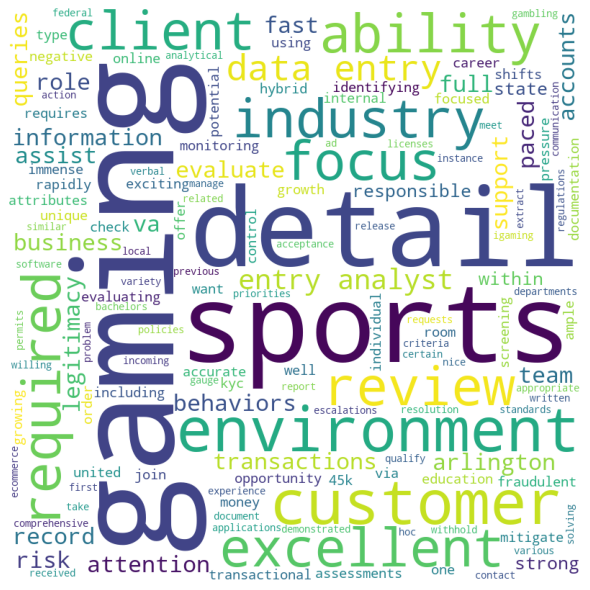

In [269]:
#WordCloud to Visualize Frequency of Word in Job Description
final_job_filtered_sentence = " ".join(final_job_filtered)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(final_job_filtered_sentence)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

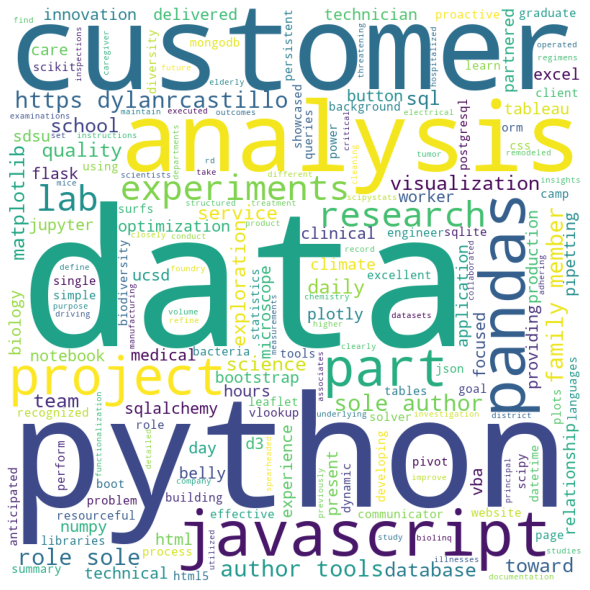

In [267]:
#WordCloud to Visualize Frequency of Words in Resume
resume_filtered_sentence = ' '.join(final_resume_filtered)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(resume_filtered_sentence)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 